手写数字识别

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [3]:
data = sio.loadmat('E:/ML_NG/03-neural network/ex3data1.mat')

In [4]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [5]:
type(data)   #字典类型

dict

In [7]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [8]:
raw_X = data['X']
raw_y = data['y']        #所需数据特征为X，y

In [10]:
print(raw_X.shape,raw_y.shape)

(5000, 400) (5000, 1)


随机打印一个数字

In [16]:
def plot_an_image(X):
    
    pick_one = np.random.randint(5000)
    
    image = X[pick_one,:]
    
    fig,ax = plt.subplots(figsize=(1,1))   #画出图片设置大小
    ax.imshow(image.reshape(20,20).T,cmap='gray_r')
    
    plt.xticks([])
    plt.yticks([])    #去除x，y轴坐标

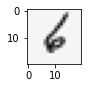

In [17]:
plot_an_image(raw_X)

In [22]:
def plot_100_images(X):
    
    sample_index = np.random.choice(len(X),100)
    images = X[sample_index,:]
    print(images.shape)
    
    fig,ax = plt.subplots(ncols=10,nrows=10,figsize=(8,8),sharex=True,sharey=True)    #共享x，y所有属性
    
    for r in range(10):
        for c in range(10):
            ax[r,c].imshow(images[10 * r + c].reshape(20,20).T,cmap='gray_r')
            
    plt.xticks([])
    plt.yticks([])
    
    plt.show

(100, 400)


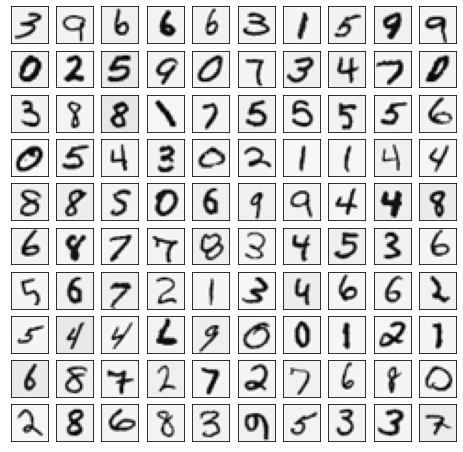

In [23]:
plot_100_images(raw_X)

In [24]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [43]:
def costFunction(theta,X,y,lamda):
    A = sigmoid(X@theta)
    
    first = y * np.log(A)
    second = (1-y) * np.log(1-A)
    
#    reg = np.sum(np.power(theta[1:],2)) * (lamda / 2 * len(X))
    reg = theta[1:]@theta[1:] * (lamda / 2 * len(X))
    return -np.sum(first + second)/len(X) + reg

In [27]:
def gradient_reg(theta,X,y,lamda):
    reg = np.power(theta[1:],2) * (lamda * len(X))
    reg = np.insert(reg,0,values=0,axis=0)
    
    first = X.T @ (sigmoid(X@theta) - y) / len(X)
    
    return first+reg

In [28]:
X = np.insert(raw_X,0,values=1,axis=1)
X.shape

(5000, 401)

In [29]:
y = raw_y.flatten()
y.shape

(5000,)

In [44]:
from scipy.optimize import minimize

def one_vs_all(X,y,lamda,K):
    
    n = X.shape[1]   #维度第二个值，特征个数
    
    theta_all = np.zeros((K,n))
    
    for i in range(1,K+1):
        theta_i = np.zeros(n,)
        
        res = minimize(fun = costFunction,
                      x0 = theta_i,
                      args = (X,y == i,lamda ),
                      method = 'TNC',
                      jac = gradient_reg )
        theta_all[i-1,:] = res.x
        
    return theta_all

In [41]:
lamda = 1
K = 10

In [45]:
theta_final = one_vs_all(X,y,lamda,K)

In [46]:
theta_final

array([[-3.70063327e-05,  0.00000000e+00,  0.00000000e+00, ...,
        -2.24840067e-10,  2.31987686e-11,  0.00000000e+00],
       [-8.96348838e-05,  0.00000000e+00,  0.00000000e+00, ...,
         7.26564918e-09, -6.20347389e-10,  0.00000000e+00],
       [-8.39611459e-05,  0.00000000e+00,  0.00000000e+00, ...,
        -7.62018965e-10,  4.65073120e-11,  0.00000000e+00],
       ...,
       [-7.01110462e-05,  0.00000000e+00,  0.00000000e+00, ...,
        -6.92546427e-10,  4.29540871e-11,  0.00000000e+00],
       [-7.65198380e-05,  0.00000000e+00,  0.00000000e+00, ...,
        -8.09856956e-10,  5.31252881e-11,  0.00000000e+00],
       [-6.63341195e-05,  0.00000000e+00,  0.00000000e+00, ...,
        -3.50089808e-09,  1.13781556e-10,  0.00000000e+00]])

In [47]:
def predict(X,theta_final):
    
    h = sigmoid(X@theta_final.T)    #(5000,401)(10,402)=>(5000,10)
    
    h_argmax = np.argmax(h,axis=1)  #返回最大值索引
    
    return  h_argmax+1

In [50]:
y_pred =  predict(X,theta_final)

In [51]:
acc = np.mean(y_pred)

In [52]:
acc

5.8234